In [87]:
import pandas

#Import Data Vizualisation Tools
import matplotlib.pyplot as plt
import seaborn

# Import wget to download files
import wget

#Display all columns
pandas.options.display.max_columns = None

#For Date conversoin
from datetime import datetime

# Download S&P500 with details from https://datahub.io/collections/stock-market-data

In [12]:
url = 'https://datahub.io/core/s-and-p-500-companies-financials/r/constituents-financials.csv'
SP500 = wget.download(url)
df_SP500 = pandas.read_csv(SP500)
print(df_SP500.shape)
df_SP500.head()

(505, 14)


,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


## Explore Data

### Get the sector distribution

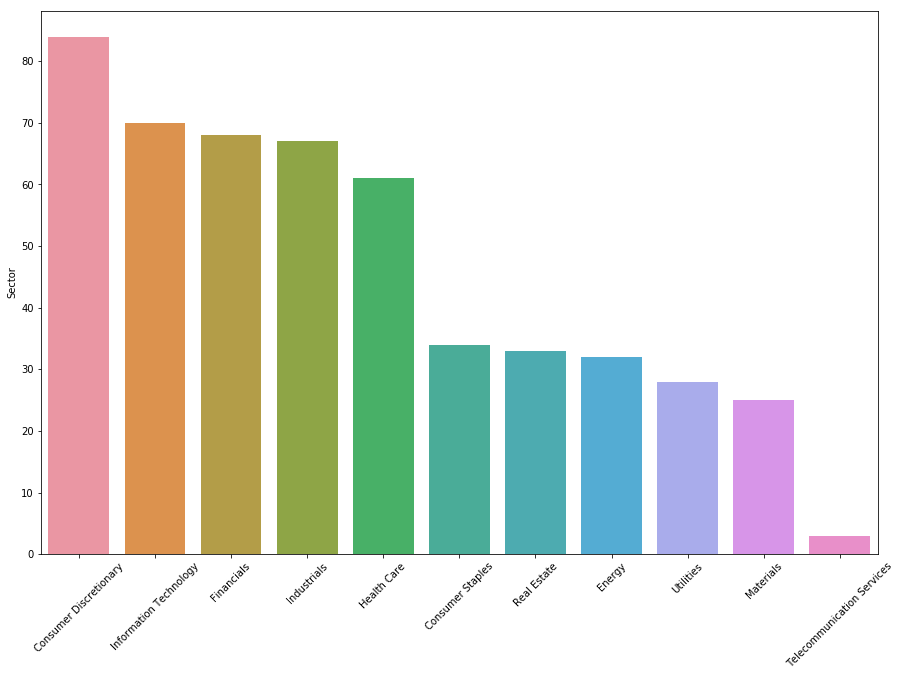

In [29]:
df_Sectors = pandas.DataFrame(df_SP500.Sector.value_counts())
plt.figure(figsize = (15,10))
plt.xticks(rotation = 45)
seaborn.barplot(x = df_Sectors.index, y = df_Sectors.Sector)

Price


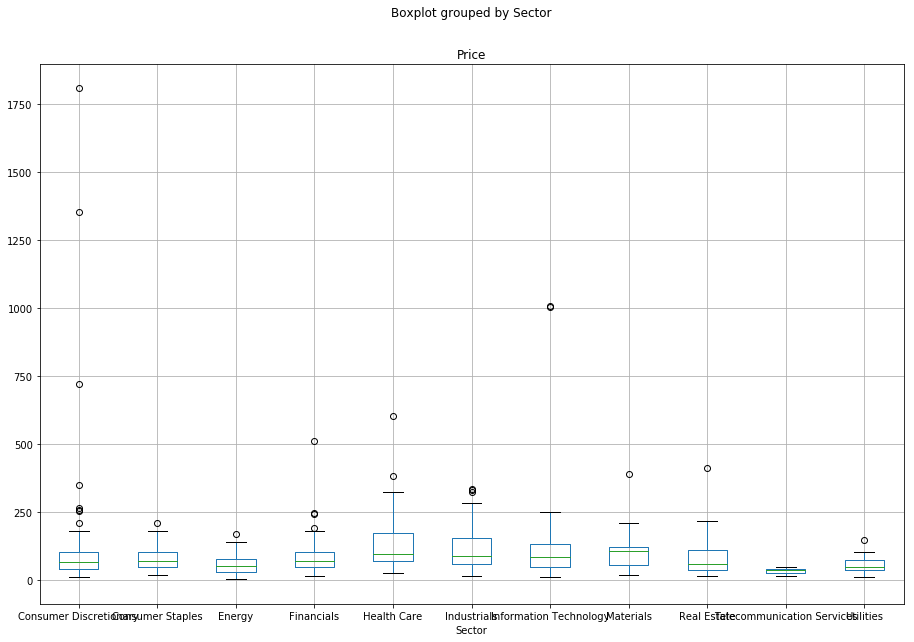

Price/Earnings


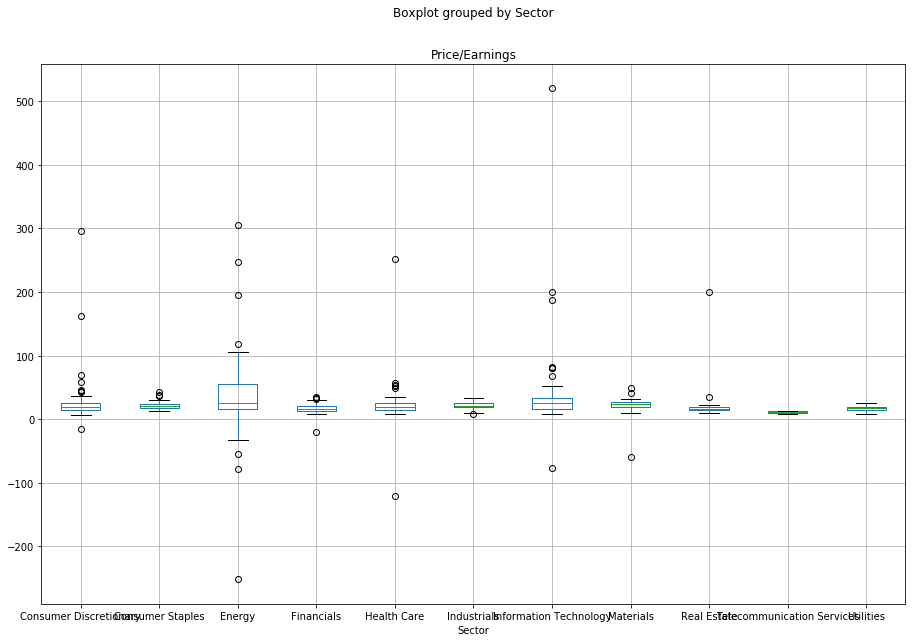

Dividend Yield


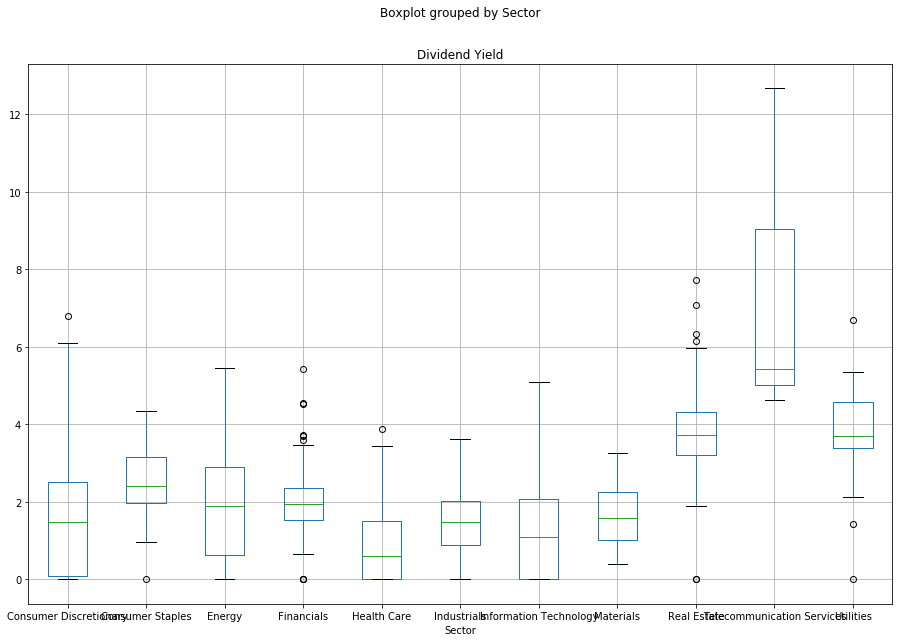

Earnings/Share


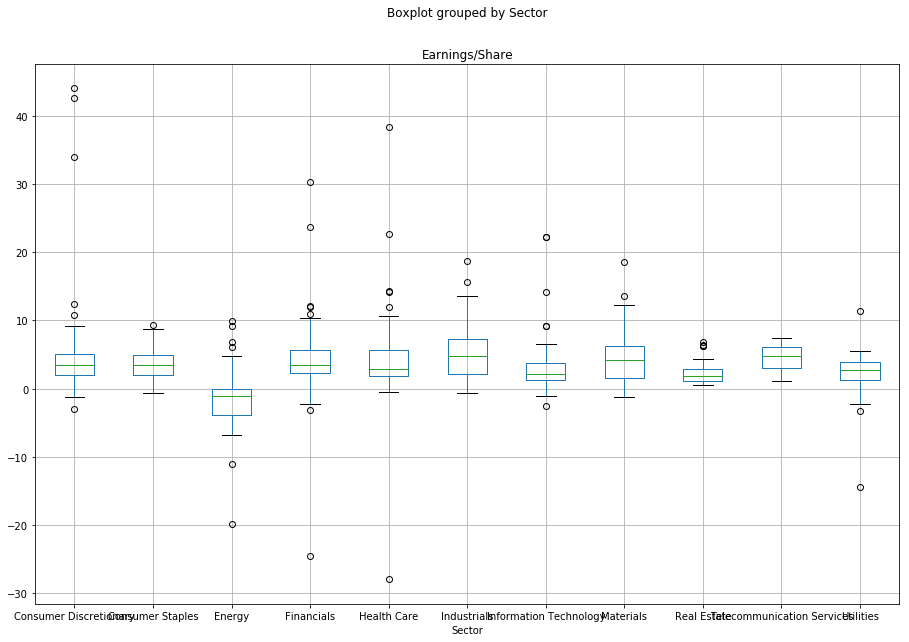

52 Week Low


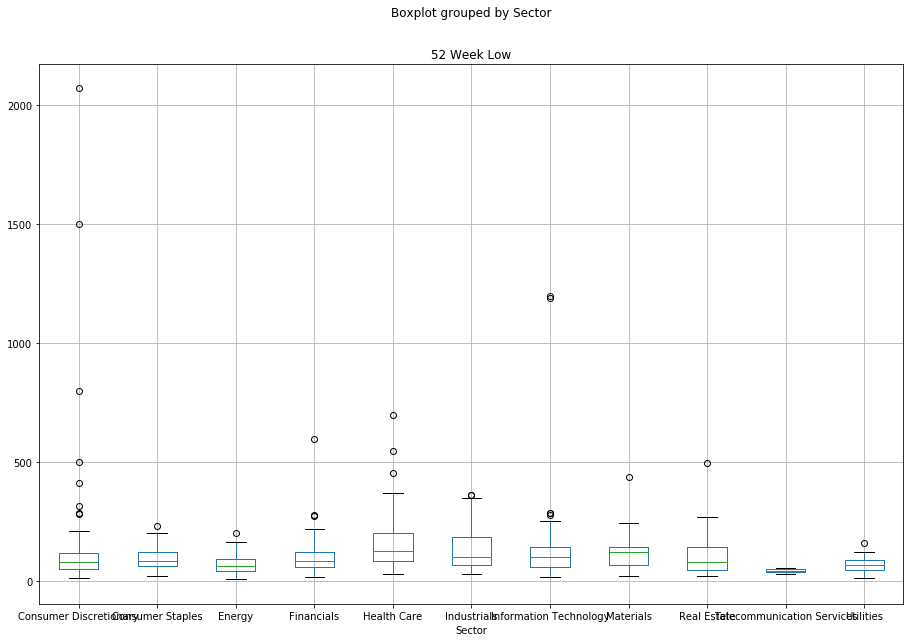

52 Week High


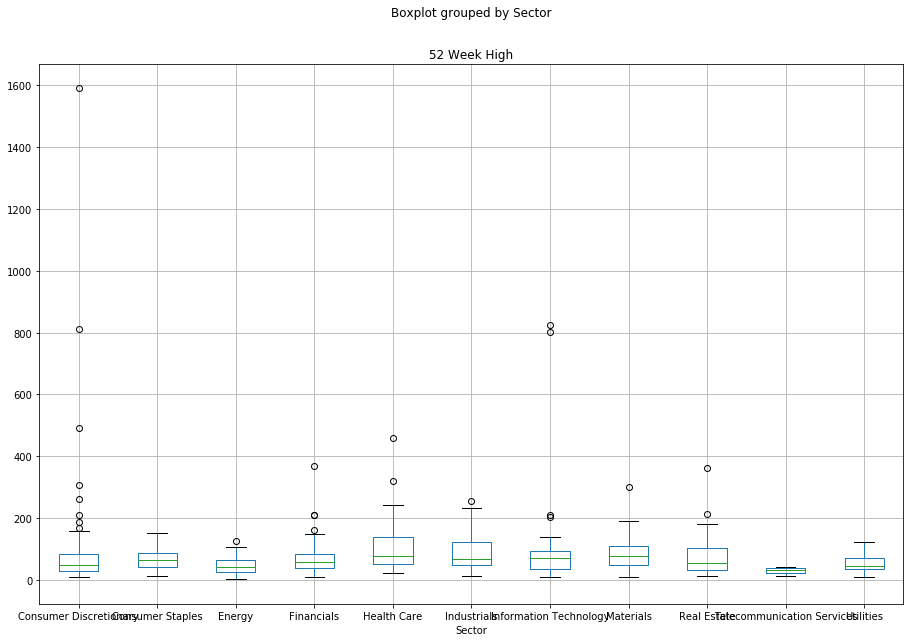

Market Cap


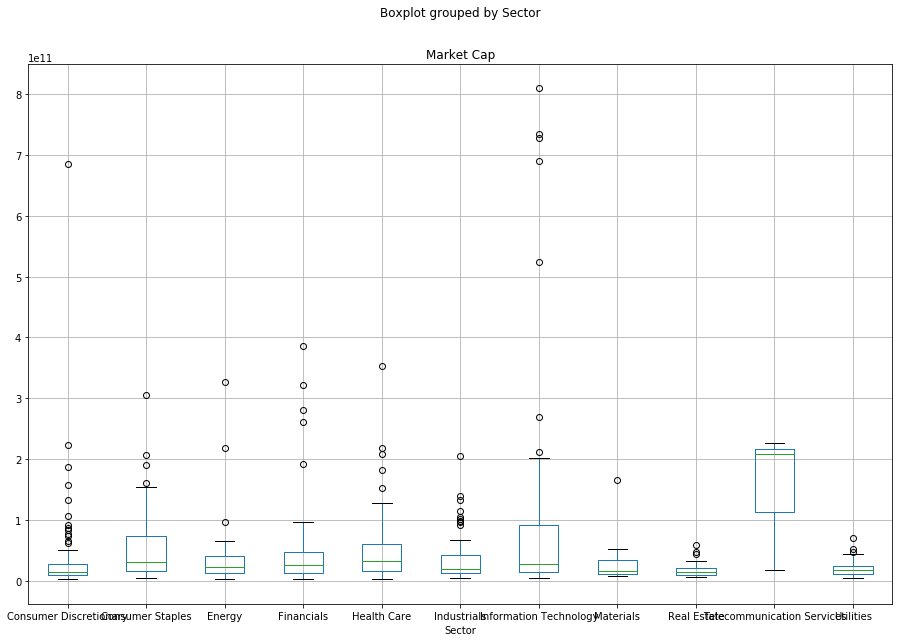

EBITDA


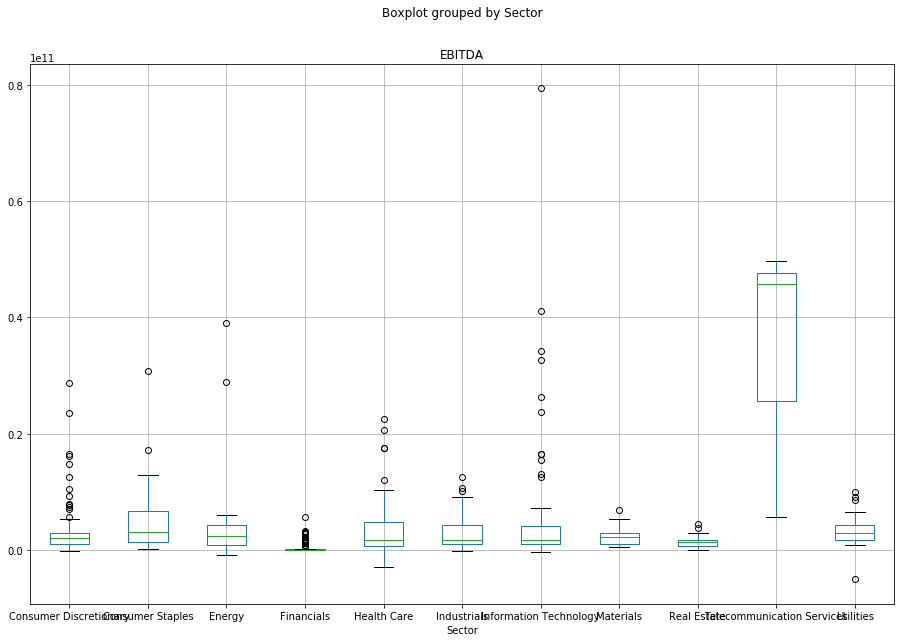

Price/Sales


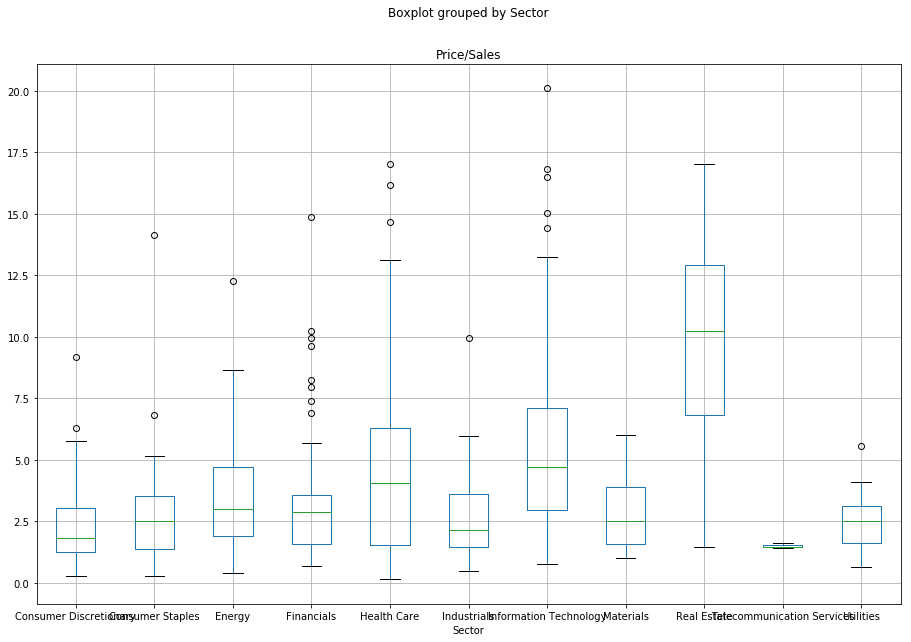

Price/Book


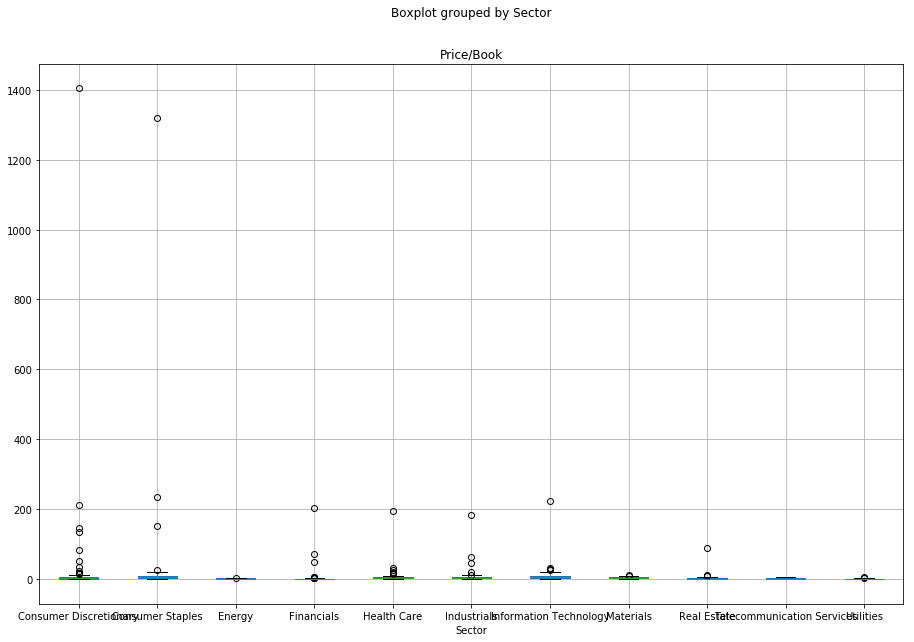

In [62]:
for i in range(3,len(df_SP500.columns) - 1):
    print(df_SP500.columns[i])
    df_SP500.boxplot(column = df_SP500.columns[i], by="Sector",figsize = [15,10])
    plt.show()


# Download S&P500 Index

In [13]:
url = 'https://datahub.io/core/s-and-p-500/r/data.csv'
SP500_index = wget.download(url)
df_SP500_index = pandas.read_csv(SP500_index)
df_SP500_index.drop('PE10',axis = 1, inplace = True)
df_SP500_index.set_index('Date',inplace = True)
print(df_SP500_index.shape)
df_SP500_index.head()

(1768, 10)


,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1871-01-01,4.44,0.26,0.4,12.46,5.32,89.00,5.21,8.02,NaN
1,1871-02-01,4.50,0.26,0.4,12.84,5.32,87.53,5.06,7.78,NaN
2,1871-03-01,4.61,0.26,0.4,13.03,5.33,88.36,4.98,7.67,NaN
3,1871-04-01,4.74,0.26,0.4,12.56,5.33,94.29,5.17,7.96,NaN
4,1871-05-01,4.86,0.26,0.4,12.27,5.33,98.93,5.29,8.14,NaN


### Plot values

SP500
Dividend
Earnings
Consumer Price Index
Long Interest Rate
Real Price
Real Dividend
Real Earnings


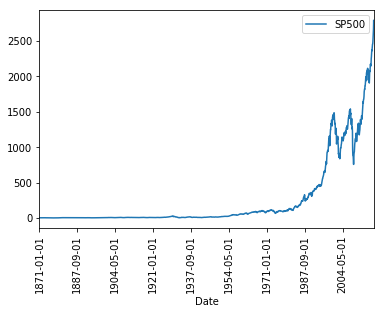

<Figure size 1080x720 with 0 Axes>

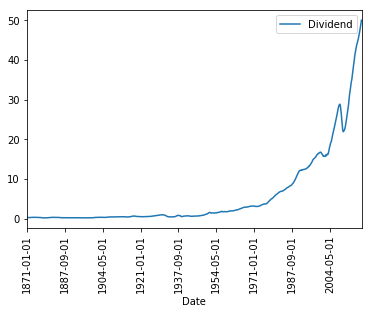

<Figure size 1080x720 with 0 Axes>

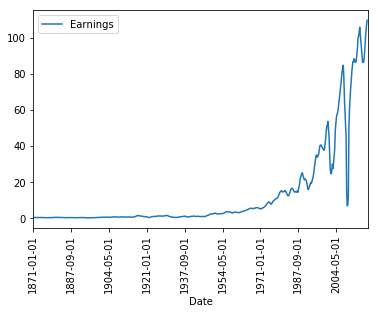

<Figure size 1080x720 with 0 Axes>

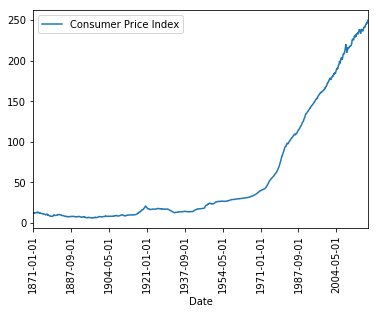

<Figure size 1080x720 with 0 Axes>

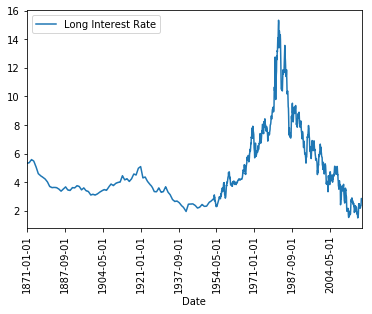

<Figure size 1080x720 with 0 Axes>

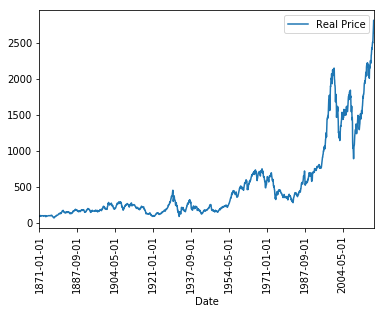

<Figure size 1080x720 with 0 Axes>

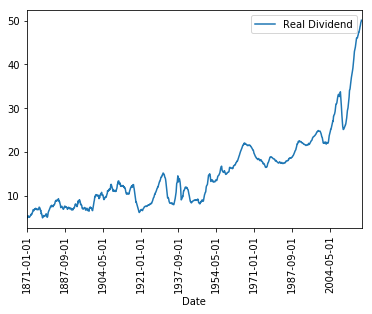

<Figure size 1080x720 with 0 Axes>

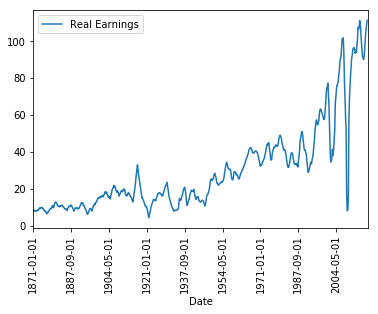

<Figure size 1080x720 with 0 Axes>

In [79]:
for i in df_SP500_index.columns:
    print(i)
    df_SP500_index.plot(y = i)
    plt.xticks(rotation = 90)
    plt.figure(figsize=[15,10])

### Show correlations

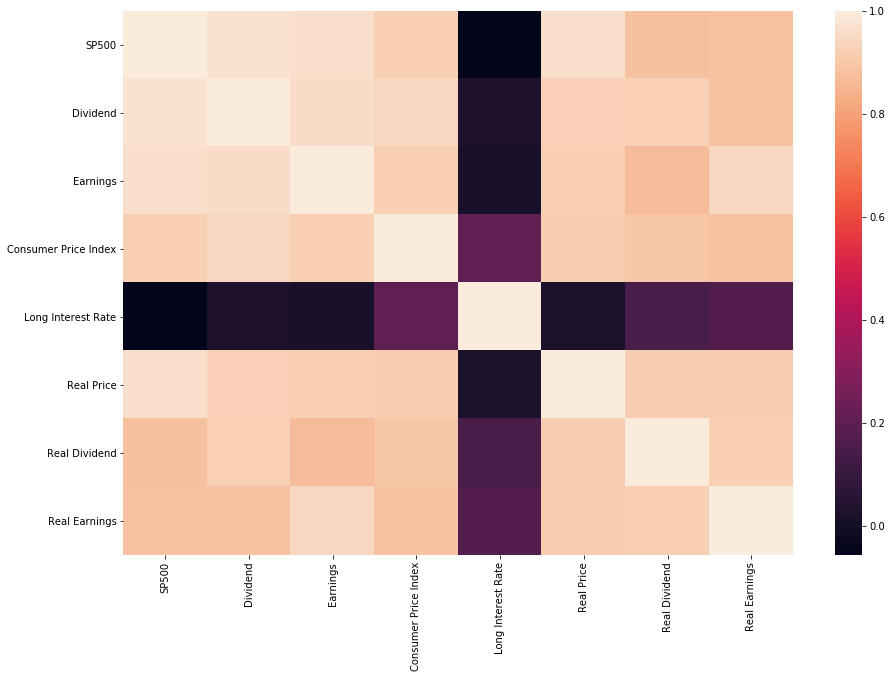

In [82]:
plt.figure(figsize=[15,10])
seaborn.heatmap(df_SP500_index.corr())

# Download VIX - CBOE

In [14]:
url ='https://datahub.io/core/finance-vix/r/vix-daily.csv'
Vix = wget.download(url)
df_Vix = pandas.read_csv(Vix)
print(df_Vix.shape)
df_Vix.head()

(3870, 5)


,Date,VIX Open,VIX High,VIX Low,VIX Close
0,2004-01-02,17.96,18.68,17.54,18.22
1,2004-01-05,18.45,18.49,17.44,17.49
2,2004-01-06,17.66,17.67,16.19,16.73
3,2004-01-07,16.72,16.75,15.50,15.50
4,2004-01-08,15.42,15.68,15.32,15.61


# Download natural Gaz

In [15]:
url ='https://datahub.io/core/natural-gas/r/daily.csv'
Gas = wget.download(url)
df_Gas = pandas.read_csv(Gas)
df_Gas.Date = pandas.to_datetime(df_Gas.Date)
df_Gas.set_index('Date',inplace = True)
print(df_Gas.shape)
df_Gas.head()

(5621, 2)


,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00


<Figure size 1080x720 with 0 Axes>

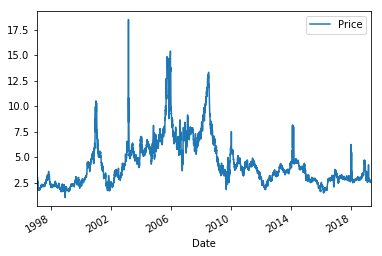

In [93]:
plt.figure(figsize = [15,10])
df_Gas.plot()

# Download Gold Price

In [16]:
url ='https://datahub.io/core/gold-prices/r/monthly.csv'
Gold = wget.download(url)
df_Gold = pandas.read_csv(Gold)
df_Gold.set_index('Date',inplace = True)
print(df_Gold.shape)
df_Gold.head()

(832, 2)


,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 <a list of 10 Text xticklabel objects>)

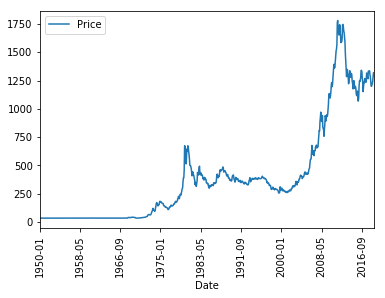

In [96]:
df_Gold.plot()
plt.xticks(rotation = 90)